In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset_pos = pd.read_csv("/content/gdrive/MyDrive/positives.csv")
dataset_pos.head()

,Unnamed: 0,Sentence,Label
0,0,Aagenaes syndrome is a syndrome characterised ...,1
1,1,Aarskog–Scott syndrome is a rare disease inher...,1
2,2,SHORT syndrome is a medical condition in which...,1
3,3,Aase syndrome or Aase–Smith syndrome is a rare...,1
4,4,Aase syndrome or Aase–Smith syndrome is a rare...,1


In [ ]:
dataset_pos['Category'] = 'Disease'
dataset_pos.head()

,Unnamed: 0,Sentence,Label,Category
0,0,Aagenaes syndrome is a syndrome characterised ...,1,Disease
1,1,Aarskog–Scott syndrome is a rare disease inher...,1,Disease
2,2,SHORT syndrome is a medical condition in which...,1,Disease
3,3,Aase syndrome or Aase–Smith syndrome is a rare...,1,Disease
4,4,Aase syndrome or Aase–Smith syndrome is a rare...,1,Disease


In [ ]:
dataset_neg = pd.read_csv("/content/gdrive/MyDrive/negatives.csv")
dataset_neg['Category'] = 'Non-Disease'
dataset_neg.head()

,Unnamed: 0,Sentence,Label,Category
0,0,Broom: An International Magazine of the Arts w...,0,Non-Disease
1,1,"The Vola ni Kawa Bula, commonly known as the V...",0,Non-Disease
2,2,Biała (the feminine form of biały) is a Polish...,0,Non-Disease
3,3,Ali Asgari may refer to:,0,Non-Disease
4,4,Deoxycytidine diphosphate is a nucleoside diph...,0,Non-Disease


In [ ]:
dataset = pd.concat([dataset_pos,dataset_neg])
del dataset['Label']

In [ ]:
dataset.head()

,Unnamed: 0,Sentence,Category
0,0,Aagenaes syndrome is a syndrome characterised ...,Disease
1,1,Aarskog–Scott syndrome is a rare disease inher...,Disease
2,2,SHORT syndrome is a medical condition in which...,Disease
3,3,Aase syndrome or Aase–Smith syndrome is a rare...,Disease
4,4,Aase syndrome or Aase–Smith syndrome is a rare...,Disease


In [ ]:
dataset['Category'].value_counts()

Non-Disease    10000
Disease         3692
Name: Category, dtype: int64

In [ ]:
target_category = dataset['Category'].unique()
print(target_category)

['Disease' 'Non-Disease']


In [ ]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,Unnamed: 0,Sentence,Category,CategoryId
0,0,Aagenaes syndrome is a syndrome characterised ...,Disease,0
1,1,Aarskog–Scott syndrome is a rare disease inher...,Disease,0
2,2,SHORT syndrome is a medical condition in which...,Disease,0
3,3,Aase syndrome or Aase–Smith syndrome is a rare...,Disease,0
4,4,Aase syndrome or Aase–Smith syndrome is a rare...,Disease,0


In [ ]:
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,Disease,0
0,Non-Disease,1


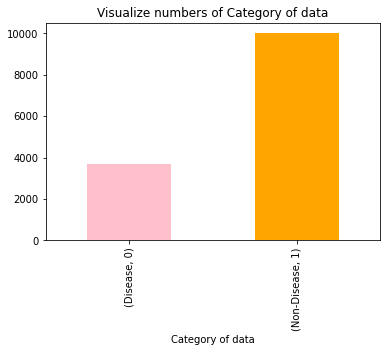

In [ ]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visualize numbers of Category of data")
plt.show()

In [ ]:
dataset['Sentence'] = dataset['Sentence'].str.replace("\r", " ")
dataset['Sentence'] = dataset['Sentence'].str.replace("\n", " ")
dataset['Sentence'] = dataset['Sentence'].str.replace("    ", " ")

In [ ]:
dataset['Sentence'] = dataset['Sentence'].str.replace("[0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dataset['Sentence'] = dataset['Sentence'].str.lower()
punctuation_signs = list("?:!.,;[]{}()%/")

for punct_sign in punctuation_signs:
    dataset['Sentence'] = dataset['Sentence'].str.replace(punct_sign, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [ ]:
dataset['Sentence'] = dataset['Sentence'].str.replace("'s", "")

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    dataset['Sentence'] = dataset['Sentence'].str.replace(regex_stopword, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
nrows = len(dataset)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    # text = dataset.loc[row]['Sentence'].str
    text = dataset.iloc[row]['Sentence']
    try:
        text_words = text.split(" ")
    except AttributeError:
        pass 

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [ ]:
dataset_revised = dataset
dataset_revised['Sentence'] = lemmatized_text_list

In [ ]:
print(len(dataset_revised['Sentence']))
print(len(dataset['Sentence']))

13692
13692


In [ ]:
# Separate the majority and minority classes
dataset_minority  = dataset_revised[dataset_revised['CategoryId']==0]
dataset_majority = dataset_revised[dataset_revised['CategoryId']==1]

# Now, downsamples majority labels equal to the number of samples in the minority class
dataset_majority = dataset_majority.sample(len(dataset_minority), random_state=42)

# concat the majority and minority dataframes
df = pd.concat([dataset_minority,dataset_majority])

# Shuffle the dataset to prevent the model from getting biased by similar samples
df = df.sample(frac=1, random_state=0)

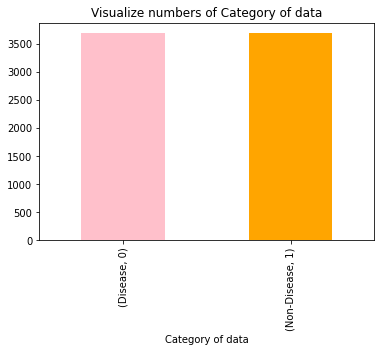

In [ ]:
df.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visualize numbers of Category of data")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], 
                                                    df['CategoryId'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
len(X_train)

5907

In [ ]:
len(X_test)

1477

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOCUMENT_FREQUENCY = 2

kwargs = {
        'ngram_range': NGRAM_RANGE,  
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'max_features' : TOP_K,
        'analyzer': TOKEN_MODE, 
        'min_df': MIN_DOCUMENT_FREQUENCY,
}
vectorizer = TfidfVectorizer(**kwargs)

features_train = vectorizer.fit_transform(X_train).toarray()
features_test = vectorizer.transform(X_test).toarray()

# # Select top 'k' of the vectorized features.
# selector = SelectKBest(f_classif, k=min(TOP_K, features_train.shape[1]))
# selector.fit(features_train, y_train)
# x_train = selector.transform(features_train).astype('float32')
# x_val = selector.transform(features_test).astype('float32')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


In [ ]:
print(features_train.shape)
print(features_test.shape)

(5907, 20000)
(1477, 20000)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# I(max_words) --(W1)--> H(512)
model = keras.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(features_train.shape[1:])))

# H(512) --(W2)--> O(num_classes)
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Add Optimization method, loss function, and optimization variable
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# Train and validate model.
history = model.fit(features_train, y_train, epochs=1000, validation_data=(features_test, y_test), verbose=2, batch_size=128)
# Print results.
history = history.history
print('Validation accuracy: {acc}, loss: {loss}'.format(
        acc=history['val_accuracy'][-1], loss=history['val_loss'][-1]))


Epoch 1/1000
47/47 - 4s - loss: 0.2916 - accuracy: 0.9643 - val_loss: 0.0839 - val_accuracy: 0.9865 - 4s/epoch - 88ms/step
Epoch 2/1000
47/47 - 0s - loss: 0.0483 - accuracy: 0.9909 - val_loss: 0.0543 - val_accuracy: 0.9892 - 453ms/epoch - 10ms/step
Epoch 3/1000
47/47 - 0s - loss: 0.0249 - accuracy: 0.9954 - val_loss: 0.0485 - val_accuracy: 0.9892 - 450ms/epoch - 10ms/step
Epoch 4/1000
47/47 - 0s - loss: 0.0156 - accuracy: 0.9971 - val_loss: 0.0464 - val_accuracy: 0.9892 - 438ms/epoch - 9ms/step
Epoch 5/1000
47/47 - 0s - loss: 0.0109 - accuracy: 0.9981 - val_loss: 0.0457 - val_accuracy: 0.9898 - 440ms/epoch - 9ms/step
Epoch 6/1000
47/47 - 0s - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0454 - val_accuracy: 0.9905 - 432ms/epoch - 9ms/step
Epoch 7/1000
47/47 - 0s - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0458 - val_accuracy: 0.9905 - 419ms/epoch - 9ms/step
Epoch 8/1000
47/47 - 0s - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0462 - val_accuracy: 0.9905 - 430ms/epoch - 9ms/step


In [ ]:
# Save model.
model.save('/content/gdrive/MyDrive/Disease_classification_model1.h5')

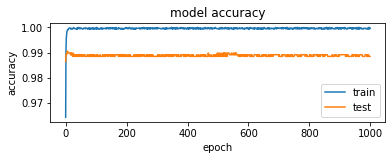

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

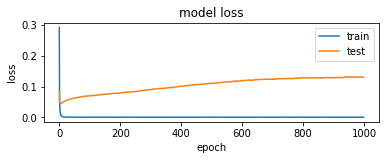

In [ ]:
plt.subplot(2,1,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')